In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### big idea:
#### I wanted to find out how crime in NYC is changing depending of the month of the year,  how are the victims and what are the most prevalent types of crime. Histogram shows daily volums of crimes and what is the average number of incidents.  

### source:
### https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243

In [16]:
#upload csv file from nycopendata
dt=pd.read_csv(r"C:\Users\Maryla\Desktop\4400\PROJECT\NYPD_Complaint_Data_Current__Year_To_Date_.csv")
dt.head(2)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,12/31/2019,18:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,U,NaN,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,12/30/2019,20:30:00,12/31/2019,10:00:00,COMPLETED,NaN,NaN,...,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"


In [3]:
#remove all data that is not for 2019 year
dt["year"]=dt.apply(lambda row: row.CMPLNT_FR_DT[6:10], axis=1)
dt["year"]=dt["year"].astype(str)
dt.drop(dt[dt["year"]!="2019"].index, inplace=True)

In [4]:
#get daily number of complaints for histogram
dailycrimes=dt.groupby("CMPLNT_FR_DT").agg({"CMPLNT_NUM":"count"},axis=1)

In [5]:
#create array to use in histogram
dailycrimes_arr=np.array(dailycrimes["CMPLNT_NUM"])
print(dailycrimes_arr[0:10])

[1999 1236 1255 1350 1156 1039 1144 1184 1191 1230]


In [6]:
#create new column called months to aggregate by month and year
dt["Months"]=dt.apply(lambda row: row.CMPLNT_FR_DT[0:2], axis =1)
dt.head(2)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,year,Months
0,314773184,48,BRONX,12/31/2019,18:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)",2019,12
1,289837961,25,MANHATTAN,12/30/2019,20:30:00,12/31/2019,10:00:00,COMPLETED,NaN,NaN,...,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)",2019,12


In [7]:
#aggregate by month to get number of complaints by month
number_of_compaints=dt.groupby("Months").agg({"CMPLNT_NUM":"count"},axis=1)

In [8]:
#create arrays
compl =np.array(number_of_compaints["CMPLNT_NUM"])
months=np.array(number_of_compaints.index)
print (months)
print (compl)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
[35843 31770 36284 36247 40022 39708 42045 40650 39878 39165 35981 33383]


In [9]:
#aggregate by type of crime
types_of_crimes=dt.groupby("LAW_CAT_CD").agg({"CMPLNT_NUM":"count"},axis=1)
types_of_crimes

,CMPLNT_NUM
LAW_CAT_CD,
FELONY,137569
MISDEMEANOR,241775
VIOLATION,71632


In [10]:
#create array for type of crime - used in pie chart
types_crime_arr=np.array(types_of_crimes["CMPLNT_NUM"])
crime_name=np.array(types_of_crimes.index)
print (types_crime_arr)
print (crime_name)

[137569 241775  71632]
['FELONY' 'MISDEMEANOR' 'VIOLATION']


In [11]:
dt["VIC_RACE"].unique()

array(['WHITE HISPANIC', 'WHITE', 'UNKNOWN', 'BLACK',
       'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC',
       'AMERICAN INDIAN/ALASKAN NATIVE', nan], dtype=object)

In [12]:
#clean up
dt.dropna(subset=["VIC_RACE"])
dt.drop(dt[dt["VIC_RACE"]=="UNKNOWN"].index, inplace = True)
#aggregate by victim race
vic_race=dt.groupby("VIC_RACE").agg({"CMPLNT_NUM":"count"},axis=1)
vic_race

,CMPLNT_NUM
VIC_RACE,
AMERICAN INDIAN/ALASKAN NATIVE,2632
ASIAN / PACIFIC ISLANDER,33968
BLACK,113960
BLACK HISPANIC,18526
WHITE,70428
WHITE HISPANIC,77877


In [13]:
#create arrays
vic_race_arr=np.array(vic_race["CMPLNT_NUM"])
race_name=np.array(vic_race.index)
#names are to long for display so need to make them shorter
race_name=np.array(['AMER/INDIAN' ,'ASIAN', 'BLACK',
 'BLACK/HISP' ,'WHITE', 'WHITE/HISP'])
print (vic_race_arr)
print (race_name)

[  2632  33968 113960  18526  70428  77877]
['AMER/INDIAN' 'ASIAN' 'BLACK' 'BLACK/HISP' 'WHITE' 'WHITE/HISP']


Text(02, 32000, '   February has the lowest crime rate')

<Figure size 432x288 with 0 Axes>

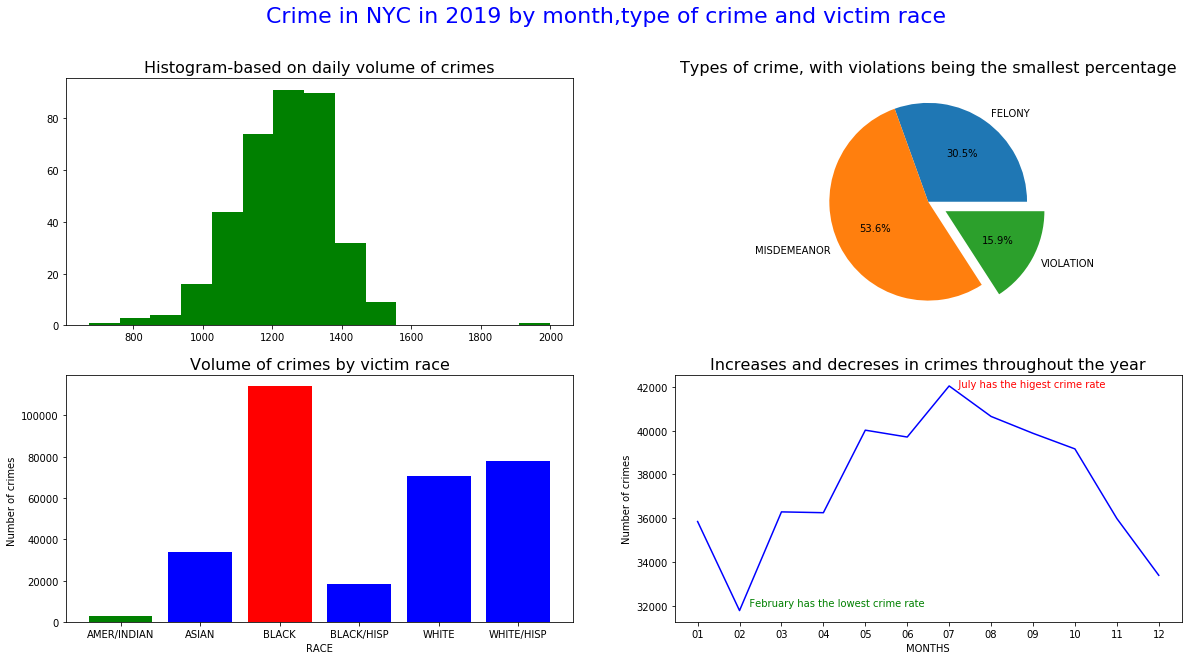

In [21]:
fig = plt.figure()
fig, axs = plt.subplots(2, 2,figsize=(20,10))
fig.suptitle("Crime in NYC in 2019 by month,type of crime and victim race",fontsize=22, color="b")
colors=["g","b","r","b","b","b"]


axs[0, 0].hist(dailycrimes_arr, bins=15, color='g')
axs[0, 0].set_title('Histogram-based on daily volume of crimes',fontsize=16)

axs[0, 1].pie(types_crime_arr, labels=crime_name, autopct='%1.1f%%',explode=(0,0,.2))
axs[0, 1].set_title('Types of crime, with violations being the smallest percentage',fontsize=16)


axs[1, 0].bar(race_name, vic_race_arr,color=colors)
axs[1, 0].set_title('Volume of crimes by victim race',fontsize=16)
axs[1, 0].set(xlabel="RACE", ylabel="Number of crimes ")

axs[1, 1].plot(months,compl, 'b-')
axs[1, 1].set_title('Increases and decreses in crimes throughout the year',fontsize=16)
axs[1, 1].set(xlabel="MONTHS", ylabel="Number of crimes")
axs[1,1].text("07", 42000, "   July has the higest crime rate",ha='left',fontsize=10,color="r")
axs[1,1].text("02", 32000, "   February has the lowest crime rate",ha='left',fontsize=10,color="g")